**Sabr Model**  
(StackEx) **[SABR Model Pricing Engine in Python QuantLib](https://quant.stackexchange.com/questions/57786/sabr-model-pricing-engine-in-python-quantlib)**


<img src='sabrVol-const.png' width='600'>

In [1]:
import QuantLib as ql
alpha, beta,  nu,   rho    =\
1.63,  0.6,  3.3, 0.00002
ql.sabrVolatility(106, 120, 17/365, alpha, beta, nu, rho)

0.33284656705268817

- op.minimizeのbounds, constraintsの書き方は神戸大学 [SciPy.optimize：解の求め方と最適化問題](https://py4basics.github.io/7_SciPy_optimize.html)を参照
- op.minimizeの戻り値は辞書。従って fndMIN.xと書ける。
- StackExではconstraintsを使用<< 書き方の参考になる
- 誤差の計算で、RMSEは動いたが、MSEではエラーになった！

In [2]:
import QuantLib as ql ; import matplotlib.pyplot as plt
import numpy as np ;    import scipy.optimize as op

fwdRT,    YR,    PRMs,           BNDs                                 =\
0.0056,   2.0, [0.1]*4, [(0,None),(0,1),(0,None),(0,1)]  
                 # PRMs=[  alpha, beta,  volvol,  rho ]
CNSTs = ({'type':'eq', 'fun':lambda x:0.5-x[1]})          #fix Beta=0.5
STKs  = [0.0006,0.0031,0.0056,0.0081,0.0106,0.0156,0.0256]
mVols = [0.9078,0.4609,0.453, 0.5017,0.5385,0.5842,0.6272]

def calcRMSE(PRMs):
    vols = [ql.sabrVolatility(XX, fwdRT, YR, *PRMs) for XX in STKs]
    return ((np.array(vols) - np.array(mVols))**2 ).mean()**.5

fndMIN = op.minimize(calcRMSE, PRMs, bounds=BNDs, constraints=CNSTs) ; fndMIN

     fun: 0.013880599265542417
     jac: array([-3.07326054e-03,  5.25782531e-02, -7.93550862e-05,  2.18536006e-05])
 message: 'Optimization terminated successfully'
    nfev: 133
     nit: 25
    njev: 25
  status: 0
 success: True
       x: array([0.03059125, 0.5       , 0.72824922, 0.44935808])

calc Vols: 0.8970, 0.4850, 0.4491, 0.4892, 0.5279, 0.5833, 0.6464, 

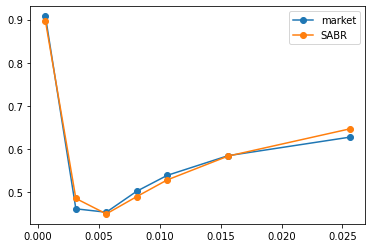

In [3]:
print('calc Vols: ', end='')
cVols = [ql.sabrVolatility(XX, fwdRT, YR, *fndMIN.x) for XX in STKs]
for vv in cVols: print(f'{vv:.4f}', end=', ')
plt.plot(STKs, mVols, marker='o', label="market")
plt.plot(STKs, cVols, marker='o', label="SABR")
plt.legend();